# Green Vegetation Temporal Dynamics: Monitoring and Analysis using NDVI and Fractional Cover TERN rasters (Part 1)

In this tutorial, we will explore how to monitor and analyse the temporal dynamics of green vegetation. To monitor these temporal dynamics we will use the Normalize Difference Vegetation Index (NDVI). To analyse the causes of the green vegetation temporal dynamics we will explore the changes in the Green Cover Fraction over time. All the datasets used in this tutorial are products of TERN's Landscapes Assessment (AusCover) program. 

We will compute NDVIs from composited seasonal Surface Reflectance images (4 seasons for year). Composite seasonal surface reflectance datasets were created from full time series of Landsat TM/ETM+ imagery. The imagery had been composited over a season to produce new imagery that is representative of the period. In this process, techniques that reduce contamination by cloud and other problems were used. In the final sections of this tutorial, we will investigate the causes of temporal NDVI change in the area of most noticeable greening. To do so, a time series of the green fraction is plotted and examined. The green fraction is one of the bands in the fractional cover product. 

This tutorial is based on Peter Scarth's *\"Simple Change Detection in Raster using TERN web services and Google Earth Engine\"* tutorial. Although it (more or less) follows Dr. Scarth's tutorial steps, both tutorials differ in some of their contents. In addition, Dr. Scarth's tutorial in implemented in python, while we will use R. 

Due to its length, this tutorial has been divided into two parts. *Part 1* describes how to perform the necessary steps required to obtain, manipulate, and display rasters in R using TERN's surface reflectance datasets as an example (see below). More detailed descriptions and explanations of these (and many other) raster operations in R are provided in TERN's "Using Raster Data in R" tutorial. *Part 2* conducts the bulk of the computation and analysis of the temporal dynamics of green vegetation, which includes (among others) operations to subset, combine, and display rasters. It also makes use of most of the steps presented in Part 1, but in Part 2 these steps are included in a function. Specifically, the two parts of this sutorial cover the following aspects (in bold Part 1, which is covered in this document):


**1. INTRODUCTORY STEPS (getting acquainted with using raster files in R):**

  * Download files from remote systems.
  * Open raster files.
  * Explore raster files.
  * Subset (i.e. crop) raster files.
  * Combine raster files into a multi-layered raster object.
  * Visualise a multi-layer raster object.
  * Re-project a raster object.
  * Open a remote map to find our bearings.

2. NORMALIZED DIFFERENCE VEGETATION INDEX (NDVI) CHANGE ANALYSIS:

  * Explore an Area where NDVI Change might have occurred
  * Conduct Tasks in the 'Introductory Steps' part (i.e. Download, Read, Subset, and Combine the Landsat Surface Reflectance Data) by:
    * Creating a function to perform these tasks.
    * Call this function on datasets 10 years apart: 2007 and 2017.
  * Compute NDVIs: Raw & Normalised
  * NDVI Change Analysis: Numerical & Visualisation
  * NDVI Time Series of Green Visualisation
  * Explore NDVI Change in an Area of Notable Greening.

For conciseness the messages returned by R are not displayed (i.e. only the results). 

The images and plots in this report can appear small at times. However, they look fine on a computer monitor when the code is run in a computer.



## INTRODUCTORY STEPS (getting familiar with the use of raster files in R)

### Preparation: Getting ready

We start by: loading the required libraries, setting up a working directory, and cleaning up memory.  


In [1]:
# Load  Libraries
# ===============

library(dplyr)
library(reshape2)
library(stringr)

library(RColorBrewer)
library(ggplot2)
library(gridExtra)
library(RStoolbox)

library(sp)

library(rgdal)
library(geojsonio)
library(raster)
library(rasterVis)

##library(RgoogleMaps)
# NOTE: When instally ggmap you might need to install the development version,
# rather than just the CRAN version (see bellow how to do it)
#library(devtools)
#devtools::install_github("dkahle/ggmap", ref = "tidyup", force=TRUE)
library(ggmap)

#library(maps)
#library(mapdata)
#library(maptools)


# Set Data Path (TERN AusCover data repository)
# =============================================
data.path = "http://qld.auscover.org.au/public/data/landsat/surface_reflectance/aus"



# Optional Steps (remove comments to run them)
# ==============

# Setting up my Current Working Directory
# ---------------------------------------
#getwd()
#my.CWDir = "C:/Users/uqbblanc/Documents/TERN/CWDir"
#setwd(my.CWDir)
#getwd()

# Clean up Memory
# ---------------
#rm(list=ls())
#list.files()

Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Warning message:
"package 'RStoolbox' was built under R version 3.5.3"Warning message:
"package 'rgdal' was built under R version 3.5.3"rgdal: version: 1.4-3, (SVN revision 828)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Users/uqbblanc/Documents/R/R-3.5.1/library/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/uqbblanc/Documents/R/R-3.5.1/library/rgdal/proj
 Linking to sp version: 1.3-1 
Warning message:
"pack


### Downloading, Reading and Exploring raster datasets.

Next, we download the file containing composited seasonal surface reflectance images for Australia. The file contains 6 layers corresponding to different satellite bands. Here, using a vrt file, we load each band individually. 'VRT' files contain descriptions of >= 1 datasets, usually in XML format, to produce a virtual GDAL(Geospatial Data Abstraction Library) dataset composed from other GDAL datasets (see Part 2 of this tutorial and references within for further description). Typing the name of the raster object will provide it a summary of its features (dimensions, resolution, extent, coordinates reference system,..). 


In [2]:
getwd()
# Data Path and Name
data.path = "http://qld.auscover.org.au/public/data/landsat/surface_reflectance/aus"
data.fn = "l8olre_aus_m201609201611_dbia2.vrt"

# Download the data file (if it doesn't work try method='wget' or functions in Library 'RCurl')
download.file(url=paste(data.path, data.fn, sep="/"), destfile='ASLM.vrt', method='auto')
list.files()

# Load the data file => We see that it has 6 bands, but only one is loaded.
ASLM.ras = raster("ASLM.vrt") # See it has 6 bands
ASLM.ras

# Load the remaining 5 Bands.
ASLM.Band2.ras = raster("ASLM.vrt", band=2)
ASLM.Band2.ras
ASLM.Band3.ras = raster("ASLM.vrt", band=3)
ASLM.Band3.ras
ASLM.Band4.ras = raster("ASLM.vrt", band=4)
ASLM.Band4.ras
ASLM.Band5.ras = raster("ASLM.vrt", band=5)
ASLM.Band5.ras
ASLM.Band6.ras = raster("ASLM.vrt", band=6)
ASLM.Band6.ras

[1] "C:/Users/uqbblanc/Documents/TERN/04b-DSDP_GitHub/Prep/Landscapes_AusCover-RemoteSensing/GreenVegetationTemporalDynamics"

[1] "ASLM.vrt"                                  
 [2] "GreenCoverFraction.vrt"                    
 [3] "JNbTut_GreenVegTempDyn_NDVInGC_P1.html"    
 [4] "JNbTut_GreenVegTempDyn_NDVInGC_P1.ipynb"   
 [5] "JNbTut_GreenVegTempDyn_NDVInGC_P1.pdf"     
 [6] "JNbTut_GreenVegTempDyn_NDVInGC_P2.html"    
 [7] "JNbTut_GreenVegTempDyn_NDVInGC_P2.ipynb"   
 [8] "JNbTut_GreenVegTempDyn_NDVInGC_P2v2.pdf"   
 [9] "LSSR_2007.vrt"                             
[10] "LSSR_2017.vrt"                             
[11] "Old_Versions"                              
[12] "README.md"                                 
[13] "Tut_GreenVegTempDyn_NDVInGC_P1.html"       
[14] "Tut_GreenVegTempDyn_NDVInGC_P1.pdf"        
[15] "Tut_GreenVegTempDyn_NDVInGC_P1.R"          
[16] "Tut_GreenVegTempDyn_NDVInGC_P1.Rmd"        
[17] "Tut_GreenVegTempDyn_NDVInGC_P2-TEMPy_files"
[18] "Tut_GreenVegTempDyn_NDVInGC_P2.html"       
[19] "Tut_GreenVegTempDyn_NDVInGC_P2.pdf"        
[20] "Tut_GreenVegTempDyn_NDVInGC_P2.R"          
[21] "Tut_GreenVegTempDyn_NDVInGC_P2.Rmd"        
[22] "Tut_GreenVegTempDyn_NDVInGC_P2_files"

class       : RasterLayer 
band        : 1  (of  6  bands)
dimensions  : 135159, 141481, 19122430479  (nrow, ncol, ncell)
resolution  : 30, 30  (x, y)
extent      : -1944645, 2299785, -4910195, -855425  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs 
data source : C:/Users/uqbblanc/Documents/TERN/04b-DSDP_GitHub/Prep/Landscapes_AusCover-RemoteSensing/GreenVegetationTemporalDynamics/ASLM.vrt 
names       : ASLM 
values      : -32768, 32767  (min, max)


class       : RasterLayer 
band        : 2  (of  6  bands)
dimensions  : 135159, 141481, 19122430479  (nrow, ncol, ncell)
resolution  : 30, 30  (x, y)
extent      : -1944645, 2299785, -4910195, -855425  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs 
data source : C:/Users/uqbblanc/Documents/TERN/04b-DSDP_GitHub/Prep/Landscapes_AusCover-RemoteSensing/GreenVegetationTemporalDynamics/ASLM.vrt 
names       : ASLM 
values      : -32768, 32767  (min, max)


class       : RasterLayer 
band        : 3  (of  6  bands)
dimensions  : 135159, 141481, 19122430479  (nrow, ncol, ncell)
resolution  : 30, 30  (x, y)
extent      : -1944645, 2299785, -4910195, -855425  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs 
data source : C:/Users/uqbblanc/Documents/TERN/04b-DSDP_GitHub/Prep/Landscapes_AusCover-RemoteSensing/GreenVegetationTemporalDynamics/ASLM.vrt 
names       : ASLM 
values      : -32768, 32767  (min, max)


class       : RasterLayer 
band        : 4  (of  6  bands)
dimensions  : 135159, 141481, 19122430479  (nrow, ncol, ncell)
resolution  : 30, 30  (x, y)
extent      : -1944645, 2299785, -4910195, -855425  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs 
data source : C:/Users/uqbblanc/Documents/TERN/04b-DSDP_GitHub/Prep/Landscapes_AusCover-RemoteSensing/GreenVegetationTemporalDynamics/ASLM.vrt 
names       : ASLM 
values      : -32768, 32767  (min, max)


class       : RasterLayer 
band        : 5  (of  6  bands)
dimensions  : 135159, 141481, 19122430479  (nrow, ncol, ncell)
resolution  : 30, 30  (x, y)
extent      : -1944645, 2299785, -4910195, -855425  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs 
data source : C:/Users/uqbblanc/Documents/TERN/04b-DSDP_GitHub/Prep/Landscapes_AusCover-RemoteSensing/GreenVegetationTemporalDynamics/ASLM.vrt 
names       : ASLM 
values      : -32768, 32767  (min, max)


class       : RasterLayer 
band        : 6  (of  6  bands)
dimensions  : 135159, 141481, 19122430479  (nrow, ncol, ncell)
resolution  : 30, 30  (x, y)
extent      : -1944645, 2299785, -4910195, -855425  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs 
data source : C:/Users/uqbblanc/Documents/TERN/04b-DSDP_GitHub/Prep/Landscapes_AusCover-RemoteSensing/GreenVegetationTemporalDynamics/ASLM.vrt 
names       : ASLM 
values      : -32768, 32767  (min, max)



### Subsetting rasters

The raster objects we have created contain seasonal surface reflectance images for the whole of Australia. They are very large objects, which makes their manipulation and processing slow. We now subset these objects to create smaller objects for our area and bands of interest.


In [3]:
# Create a new extent containing our area of interest
new.extent = extent(2030000, 2070000, -3160000, -3140000)
new.extent

# Crop (i.e. subset) the raster layers to our area of interest
ASLM.Band5SWIR.Bris.rL = crop(ASLM.Band5.ras, new.extent)
ASLM.Band5SWIR.Bris.rL
ASLM.Band4NIR.Bris.rL = crop(ASLM.Band4.ras, new.extent)
ASLM.Band4NIR.Bris.rL
ASLM.Band3Red.Bris.rL = crop(ASLM.Band3.ras, new.extent)
ASLM.Band3Red.Bris.rL

# Remove unneeded raster objects
rm(list = ls(pattern=".ras"))
ls()

class       : Extent 
xmin        : 2030000 
xmax        : 2070000 
ymin        : -3160000 
ymax        : -3140000 

class       : RasterLayer 
dimensions  : 667, 1334, 889778  (nrow, ncol, ncell)
resolution  : 30, 30  (x, y)
extent      : 2029995, 2070015, -3159995, -3139985  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs 
data source : in memory
names       : ASLM 
values      : -75, 7475  (min, max)


class       : RasterLayer 
dimensions  : 667, 1334, 889778  (nrow, ncol, ncell)
resolution  : 30, 30  (x, y)
extent      : 2029995, 2070015, -3159995, -3139985  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs 
data source : in memory
names       : ASLM 
values      : -47, 7554  (min, max)


class       : RasterLayer 
dimensions  : 667, 1334, 889778  (nrow, ncol, ncell)
resolution  : 30, 30  (x, y)
extent      : 2029995, 2070015, -3159995, -3139985  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs 
data source : in memory
names       : ASLM 
values      : 12, 7058  (min, max)


[1] "ASLM.Band3Red.Bris.rL"  "ASLM.Band4NIR.Bris.rL"  "ASLM.Band5SWIR.Bris.rL"
[4] "data.fn"                "data.path"              "new.extent"


### Combining Raster Layers into a Multi-Layer Raster & Visualising the Composite Image 

We now visualise the composite image of the 3 raster bands. To do so we will follow these steps:

  1. Remove (erroneous) negative values by giving them a missing value code ('NA')
  2. Create a multi-layered raster object from 3 single layered rasters. Specifically we combine `rasterLayer` objects into a `rasterBrick` object. See TERN DSDP **\"Using Raster Data in R\"** tutorial for more information on the raster objects classes in R. 
  3. Plot the resulting rasterBrick using the `plotRGB` function in the `raster` package and the `ggRGB` function in the `RStoolbox` library with different parameters. The latter function uses the `ggplot2` graphic library framework, so it is compatible qqplots2 features. That is, ggplot2 features can be added to ggRGB plots to enhance them.


class       : RasterLayer 
dimensions  : 667, 1334, 889778  (nrow, ncol, ncell)
resolution  : 30, 30  (x, y)
extent      : 2029995, 2070015, -3159995, -3139985  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs 
data source : in memory
names       : ASLM 
values      : 0, 7475  (min, max)


value,count
0,873072
1,16706


value,count
0.000000e+00,0.98122453
1.123876e-06,0.01877547


class       : RasterLayer 
dimensions  : 667, 1334, 889778  (nrow, ncol, ncell)
resolution  : 30, 30  (x, y)
extent      : 2029995, 2070015, -3159995, -3139985  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs 
data source : in memory
names       : ASLM 
values      : 3, 7554  (min, max)


value,count
0,873215
1,16563


value,count
0.000000e+00,0.98138524
1.123876e-06,0.01861476


class       : RasterLayer 
dimensions  : 667, 1334, 889778  (nrow, ncol, ncell)
resolution  : 30, 30  (x, y)
extent      : 2029995, 2070015, -3159995, -3139985  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs 
data source : in memory
names       : ASLM 
values      : 12, 7058  (min, max)


value,count
0,873221
1,16557


value,count
0.000000e+00,0.98139199
1.123876e-06,0.01860801


class       : RasterBrick 
dimensions  : 667, 1334, 889778, 3  (nrow, ncol, ncell, nlayers)
resolution  : 30, 30  (x, y)
extent      : 2029995, 2070015, -3159995, -3139985  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs 
data source : in memory
names       : Band3.Red, Band4.NIR, Band5.SWIR 
min values  :        12,         3,          0 
max values  :      7058,      7554,       7475 


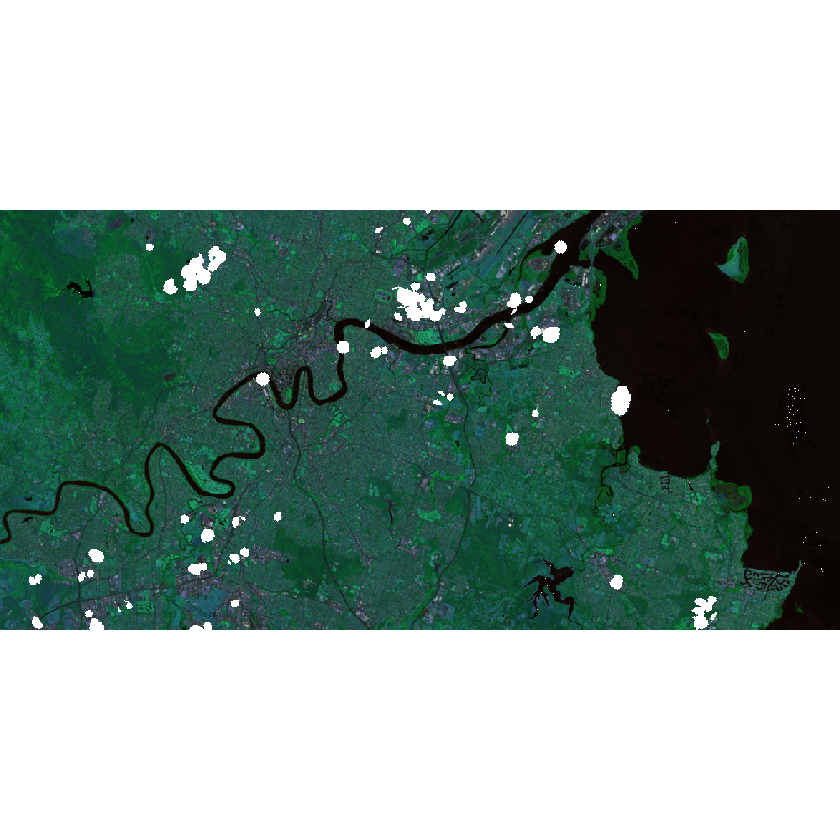

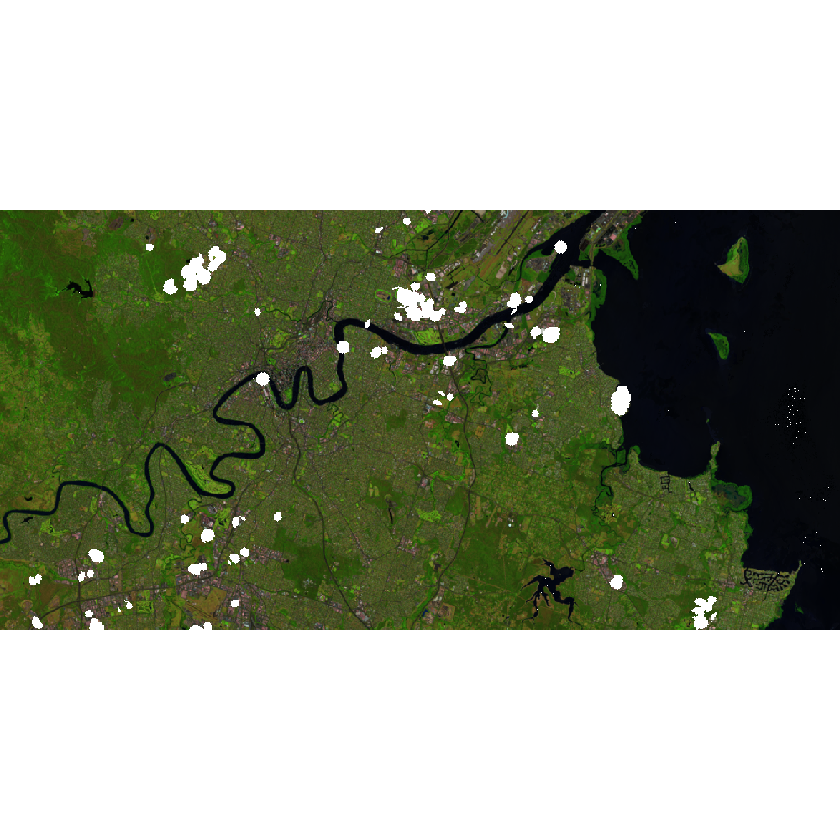

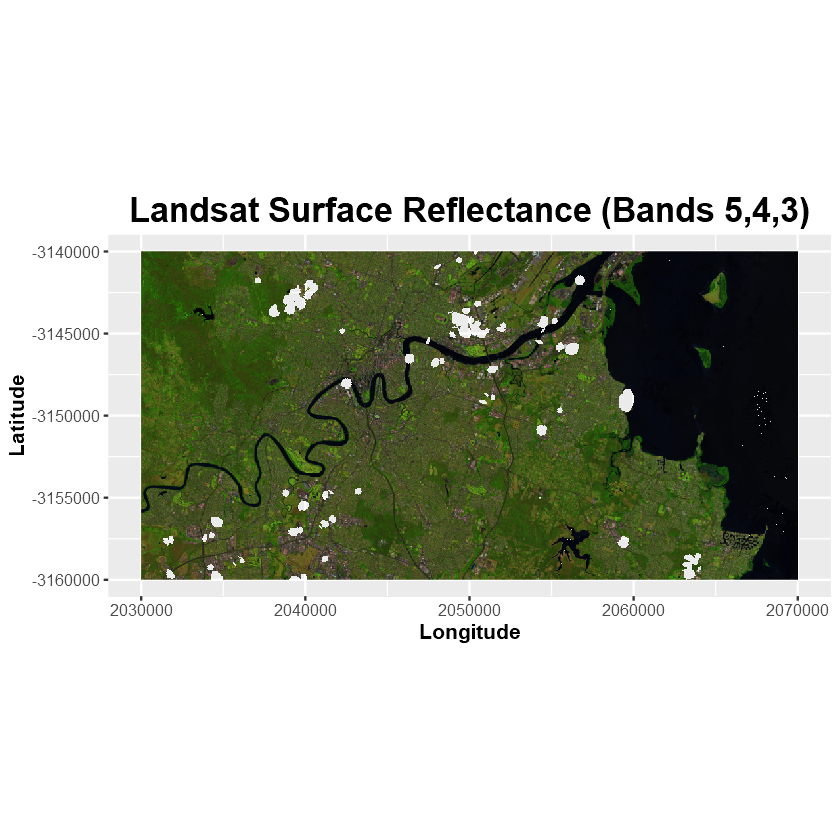

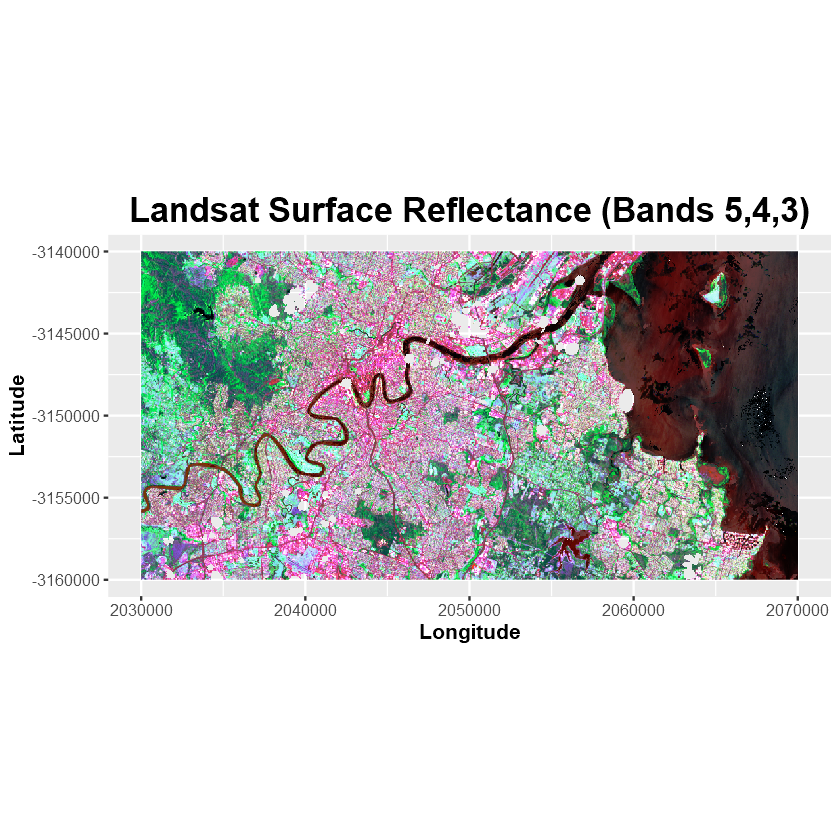

In [4]:
# Replace values < 0 with NAs
# ===========================
 # Band 5: SWIR
 # ------------
ASLM.Band5SWIR.Bris.rL[ASLM.Band5SWIR.Bris.rL < 0] = NA
ASLM.Band5SWIR.Bris.rL
freq(is.na(ASLM.Band5SWIR.Bris.rL))
freq(is.na(ASLM.Band5SWIR.Bris.rL))/ncell(ASLM.Band5SWIR.Bris.rL)
 # Band 4: NIR
 # ------------
ASLM.Band4NIR.Bris.rL[ASLM.Band4NIR.Bris.rL < 0] = NA
ASLM.Band4NIR.Bris.rL
freq(is.na(ASLM.Band4NIR.Bris.rL))
freq(is.na(ASLM.Band4NIR.Bris.rL))/ncell(ASLM.Band4NIR.Bris.rL)
 # Band 3: Red
 # ------------
ASLM.Band3Red.Bris.rL[ASLM.Band3Red.Bris.rL < 0] = NA
ASLM.Band3Red.Bris.rL
freq(is.na(ASLM.Band3Red.Bris.rL))
freq(is.na(ASLM.Band3Red.Bris.rL))/ncell(ASLM.Band3Red.Bris.rL)


# Create a multi-layered raster object
# ====================================
ASLM.Bands3to5.Bris.rB = brick(ASLM.Band3Red.Bris.rL, ASLM.Band4NIR.Bris.rL, ASLM.Band5SWIR.Bris.rL)
names(ASLM.Bands3to5.Bris.rB) = c("Band3.Red", "Band4.NIR", "Band5.SWIR")
ASLM.Bands3to5.Bris.rB


# Plot the Composite Image of the 3 Raster Bands
# ==============================================

# Plot using function 'plotRGB' from 'raster' library
# ---------------------------------------------------
plotRGB(ASLM.Bands3to5.Bris.rB, r=1, g=2, b=3)  # 2nd best looking one
plotRGB(ASLM.Bands3to5.Bris.rB, r=3, g=2, b=1)  # Best looking one

# Plot using function ggRBG from package RStoolbox for more control and enhanced plots
# ------------------------------------------------------------------------------------
ggRGB(ASLM.Bands3to5.Bris.rB, r=3, g=2, b=1) + 
labs(title= "Landsat Surface Reflectance (Bands 5,4,3)", x="Longitude", y="Latitude") +
theme(plot.title = element_text(hjust = 0.5, size=20, face="bold"), 
      axis.title = element_text(size=12, face="bold"), axis.text=element_text(size=9) )
	  
# Stretch the values to increase the contrast of the image
# Histogram stretch is the nicest looking one (square-root and linear stretch not too bad; logarithmic stretch not good)
ggRGB(ASLM.Bands3to5.Bris.rB, r=1, g=2, b=3, stretch='hist') + 
labs(title= "Landsat Surface Reflectance (Bands 5,4,3)", x="Longitude", y="Latitude") +
theme(plot.title = element_text(hjust = 0.5, size=20, face="bold"), 
      axis.title = element_text(size=12, face="bold"), axis.text=element_text(size=9) )


### Re-project the Raster Object & Using a Map to find our bearings

We will use the functions in the package `ggmap` to query map servers for a map and plot the map. The function `get_map` in this package can query Google Maps, Naver Maps, OpenStreeMap, and Stamen Maps. Unfortunately, since July 2018 to download maps from Google Maps and Naver Maps an Application Program Interface (API) Key is required and there is an associated download costs. However, we can still freely download maps from Stamen. 

The function `ggmap` from the `ggmap` package plots the raster objects produced by `get_map`. `ggmap` is also built 'on top' the `ggplot2` graphic library framework, so can use this library features. 

`ggmap` retrieves maps in geographic coordinates (latitude/longitude) on the World geodetic System of 1984 (WGS84) datum. Therefore, to compare our satellite images to these maps we first need to reprojected to this Coordinate Reference System (CRS). 

CRS can be stored in many different formats. The most common ones include: *PROJ.4* (the default output from many spatial data R packages; e.g. `sp`, `rgdal`, `raster`); *EPSG codes*, (a more concise format, found for example in the package `sf`); and *Well Known Text (WKT)* format. The EPSG format for geographic coordinates on the WGS84 datum is EPSG:4326. For more details on CRS and their formats, see TERN DSDP **\"Using Raster Data in R\"** tutorial.

We use `grid.arrange` from the package `gridExtra` place multiple 'grobs' (grid graphical objects, in our case ggplot2 derived graphics) in a page.


CRS arguments:
 +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0
+ellps=GRS80 +units=m +no_defs 

CRS arguments:
 +init=epsg:3577 +proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132
+x_0=0 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 

CRS arguments:
 +init=epsg:4326 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84
+towgs84=0,0,0 

class       : Extent 
xmin        : 152.8747 
xmax        : 153.3158 
ymin        : -27.59609 
ymax        : -27.35823 

left    bottom     right       top 
152.87466 -27.59609 153.31583 -27.35823

Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.


class       : Extent 
xmin        : 152.92 
xmax        : 153.25 
ymin        : -27.535 
ymax        : -27.425 

class       : RasterBrick 
dimensions  : 417, 1089, 454113, 3  (nrow, ncol, ncell, nlayers)
resolution  : 0.000303, 0.000264  (x, y)
extent      : 152.9201, 153.2501, -27.53511, -27.42502  (xmin, xmax, ymin, ymax)
coord. ref. : +init=epsg:4326 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : Band3.Red, Band4.NIR, Band5.SWIR 
min values  : 54.181408, 53.980226,   6.303069 
max values  :  6819.446,  7119.855,   6393.382 


Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.


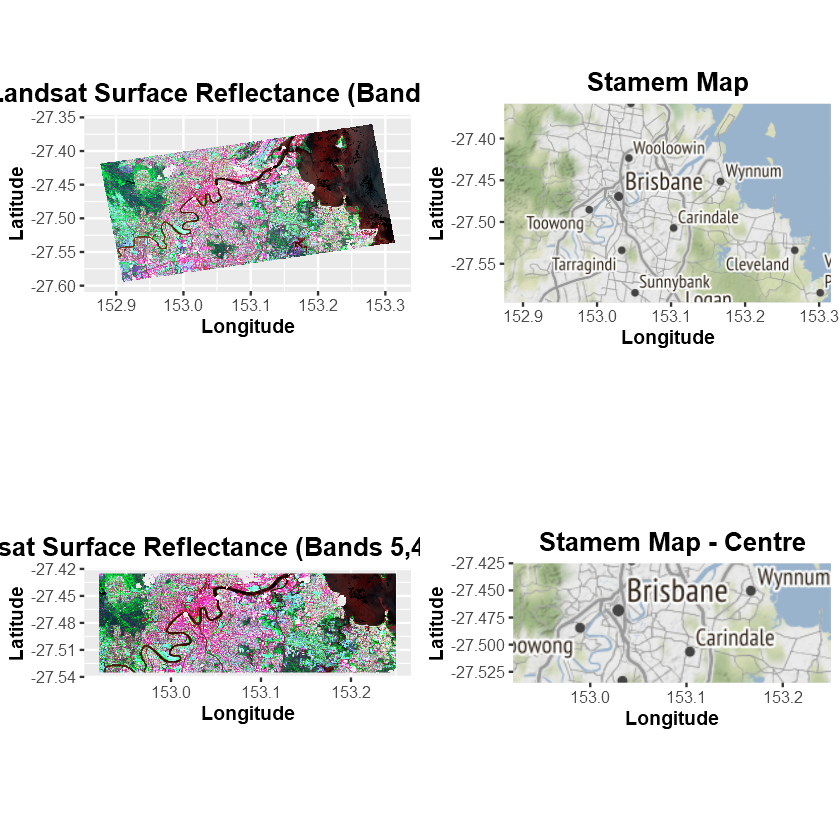

In [5]:
# View current CRS in PROJ.4 format
# ---------------------------------
crs(ASLM.Bands3to5.Bris.rB)  

# View EPSG codes as PROJ.4 formats
# ---------------------------------
 # The RasterBrick is currently in EPSG:3577. An adequate CRS for this location
CRS("+init=epsg:3577")
 # We want to re-projected to this CRS
CRS("+init=epsg:4326")

# Reproject the RasterBrick & Create a Plot of the Re-projected RasterBrick
# -------------------------------------------------------------------------
ASLM.Bands3to5.Bris.rB.prjEPSG4326 = projectRaster(ASLM.Bands3to5.Bris.rB, crs="+init=epsg:4326")
#crs(ASLM.Bands3to5.Bris.rB.prjEPSG4326)
Bris.p1 = ggRGB(ASLM.Bands3to5.Bris.rB.prjEPSG4326, r=1, g=2, b=3, stretch='hist') + 
labs(title= "Landsat Surface Reflectance (Bands 5,4,3)", x="Longitude", y="Latitude") +
theme(plot.title = element_text(hjust = 0.5, size=15, face="bold"), 
      axis.title = element_text(size=11, face="bold"), axis.text=element_text(size=9) ) 

# Make a Bounding Box
# -------------------
 # Use extent of the re-projected RasterBrick
Bris.ext.GeoCoord = extent(ASLM.Bands3to5.Bris.rB.prjEPSG4326)
Bris.ext.GeoCoord
 # Create Bounding Box for Brisbane zone in Geographic Coordinates 
Bris.long = c(extent(Bris.ext.GeoCoord)[1:2])
Bris.lat = c(extent(Bris.ext.GeoCoord)[3:4])
bbox = make_bbox(Bris.long, Bris.lat, f=0.)
bbox

# Get Map of Map from Stamen Maps & Create Plot of this Map
# ---------------------------------------------------------
#stamen.Bris.map = get_map(bbox, maptype="terrain", source="google") # Doesn't currently work
stamen.Bris.map = get_stamenmap(bbox, maptype="terrain")
Bris.p2 = ggmap(stamen.Bris.map) + labs(title= "Stamem Map", x="Longitude", y="Latitude") +
theme(plot.title = element_text(hjust = 0.5, size=15, face="bold"), 
      axis.title = element_text(size=11, face="bold"), axis.text=element_text(size=9) )

# Create a new smaller common extent to subset the image and map
# --------------------------------------------------------------
# The satelite images are oblique to the map. Focus on the shared extent. 
common.extent = extent(152.92, 153.25, -27.535, -27.425)
common.extent

# Crop & Create a Plot of the RasterBrick
# ---------------------------------------
# Crop to Raster Brick to common extent
ASLM.Bands3to5.Bris.rB.prjEPSG4326.common = crop(ASLM.Bands3to5.Bris.rB.prjEPSG4326, common.extent)
ASLM.Bands3to5.Bris.rB.prjEPSG4326.common
# Create Raster Brick Plot
Bris.p3 = ggRGB(ASLM.Bands3to5.Bris.rB.prjEPSG4326.common, r=1, g=2, b=3, stretch='hist') + 
labs(title= "Landsat Surface Reflectance (Bands 5,4,3) - Centre", x="Longitude", y="Latitude") +
theme(plot.title = element_text(hjust = 0.5, size=15, face="bold"), 
      axis.title = element_text(size=11, face="bold"), axis.text=element_text(size=9) ) 
	  
# Get Map with the common extent & Create Plot of this Map
# --------------------------------------------------------
stamen.Bris.map.common = get_stamenmap(common.extent[c(1,3,2,4)], maptype="terrain")
Bris.p4 = ggmap(stamen.Bris.map.common) + labs(title= "Stamem Map - Centre", x="Longitude", y="Latitude") +
theme(plot.title = element_text(hjust = 0.5, size=15, face="bold"), 
      axis.title = element_text(size=11, face="bold"), axis.text=element_text(size=9) )
  
# Show All 4 Plots
# ----------------
# `Grid.arrange (from Package `gridExtra): Set up a layout to place multiple ggplots on a page.
grid.arrange(Bris.p1, Bris.p2, Bris.p3, Bris.p4, nrow=2)